# Autoencoder: Denoising Images

In [2]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

##### preprocess the data

In [19]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, _), (x_test, _) = mnist.load_data()

# reshape for input convultional layer
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

###### introduce random noise to the data

In [24]:
noise = .5
mean, stddev = 0.5, 1.

x_train_noisy = x_train + noise * np.random.normal(loc=mean, scale=stddev, size=x_train.shape)
x_test_noisy  = x_test + noise * np.random.normal(loc=mean, scale=stddev, size=x_test.shape)

# Clip to range [0 -1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

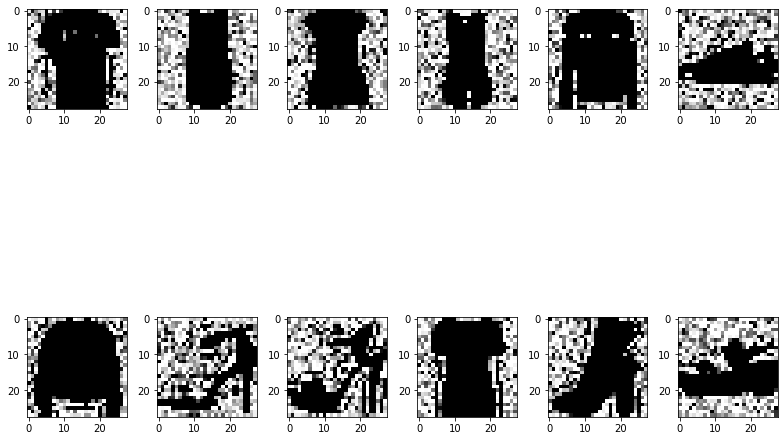

In [26]:
# display the noisy images

fig=plt.figure(figsize=(11, 11))
columns = 6
rows = 2
w, h = 28, 28

for i in range(1, columns*rows +1):
    img = np.reshape(x_train_noisy[i], [w, h])
    ax = fig.add_subplot(rows, columns, i)

    
    plt.imshow(img, cmap='Greys')
plt.tight_layout()
plt.show()

#### Create the model

##### -  encoding layers

In [65]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1))

conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                                activation='relu',
                                padding='same')(input_img) # [None, 28, 28, 32]
max_pool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same')(conv_1) # [None, 14, 14, 32]

conv_2 = tf.keras.layers.Conv2D(filters=32, kernel_size=2,
                                activation='relu',
                                padding='same')(max_pool1) # [None, 14, 14, 32]

encoded = tf.keras.layers.MaxPool2D((2, 2), padding='same')(conv_2) # [None, 7, 7, 32]

##### - decoding layers

- Decoding reverses the encoding process.


We use an UpSampling2D layer to `undo` the effect of MaxPooling

In [79]:
conv_3 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               padding='same')(encoded) # [None, 7, 7, 32]
up_sampl1 = tf.keras.layers.UpSampling2D(size=[2, 2])(conv_3) # [None, 14, 14, 32]


conv_4 = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',
                               padding='same')(up_sampl1) # [None, 14, 14, 32]
up_sampl2 = tf.keras.layers.UpSampling2D(size=[2, 2])(conv_4) # [None, 28, 28, 32]

decoded = tf.keras.layers.Conv2D(filters=1, kernel_size=3, activation='sigmoid', padding='same')(up_sampl2)

In [81]:
decoded.shape

TensorShape([None, 28, 28, 1])